In [49]:
import base64
import json
import zlib
from pathlib import Path
from matplotlib import pyplot as plt

import cv2
import jsonpickle
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# from SpeechBubblesExperiment import EXPERIMENT_PATH
# from speechbubbles.opencv_advanced import opencv_advanced_method
# from speechbubbles.opencv_basic import opencv_basic_method
from utils import get_all_comics_pages, compress_numpy_array, get_blank_with_contours, convert_blank_image_to_bw, \
    display_image_in_actual_size, prepare_dataset_for_ocr_experiment

# # im = cv.imread('tmp/CYB_BUBBLEGOM_T01_005.jpg.png')
# # imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
# # ret, thresh = cv.threshold(imgray, 127, 255, 0)
# # contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#
# # print(contours)
#
# # configs = get_all_comics_pages()
# #
# # comics_page = configs[0]
# #
# # result = opencv_advanced_method(comics_page.href)
#
# # from core.SpeechBubblesExperiment import SpeechBubblesExperiment
# # from methods.speechbubbles.ml import ml_method
# # from speechbubbles.opencv_advanced import opencv_advanced_method
# # from speechbubbles.opencv_basic import opencv_basic_method
# # from utils import prepare_dataset_for_speech_bubbles_experiment
#
# if __name__ == '__main__':
#     # prepare_dataset_for_speech_bubbles_experiment()
#     #
#     # experiment = SpeechBubblesExperiment()
#     # experiment.add_method("opencv_basic_method", ml_method)
#     # # experiment.add_method("opencv_basic_method", opencv_basic_method)
#     # # experiment.add_method("opencv_advanced_method", opencv_advanced_method)
#     #
#     # experiment.execute_all_methods()
#
#     # json_path = Path("experiments/speechbubbles/opencv_basic_method/CYB_BUBBLEGOM_T01_005.json")
#     # arr = jsonpickle.decode(json_path.read_text())
#     # res = compress_numpy_array(arr)
#     #
#     #
#     # data2 = base64.b64decode(res)
#     # data2 = zlib.decompress(data2)
#     #
#     # fdata = np.frombuffer(data2, dtype=np.uint8).reshape(arr.shape)
#
# # EXPERIMENT_PATH.
#     prepare_dataset_for_ocr_experiment()
#     comics_page = get_all_comics_pages()[0]
#     comics_page.get_contours_bounding_rect_images_and_texts()
#     input()
#     contours = comics_page.get_contours()
#     blank_image = get_blank_with_contours(contours, (int(comics_page.height), int(comics_page.width)))
#     gray = convert_blank_image_to_bw(blank_image)
#     display_image_in_actual_size(gray)
#
#     gray = np.where(gray == 255, 1, gray)
#
#     compare_img_path = "tmp/CYB_BUBBLEGOM_T01_005.jpg.png"
#     image = cv2.imread(compare_img_path)
#     # convert to RGB
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     # convert to grayscale
#     gray_compare = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#
#     gray_compare = np.where(gray_compare != 0, 1, gray_compare)
#
#     accuracy = accuracy_score(gray.reshape(-1), gray_compare.reshape(-1))
#     print(accuracy)
#     print(precision_recall_fscore_support(gray.reshape(-1), gray_compare.reshape(-1), average="binary", labels=[0, 1]))
# # print(calc_precision_recall(gray.reshape(-1), gray_compare.reshape(-1)))
#
# # im = cv.imread(comics_page.href)
# # imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
# # ret, thresh = cv.threshold(imgray, 127, 255, 0)
# # contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# # print(contours[0].shape)


In [ ]:
# prepare_dataset_for_ocr_experiment()
# comics_page = get_all_comics_pages()[0]

In [ ]:
# contours = comics_page.get_contours()[0]

In [ ]:
#contours

In [ ]:
# img = comics_page.get_img()
# (H,W,c) = img.shape
#
# res = np.zeros_like(img)
# c = np.squeeze(contours[0])
#
# # find rectangle's conner points
# x = sorted(c, key=lambda a:a[0])
# left = x[0]
# right = x[-1]
# y= sorted(c, key=lambda a:a[1])
# top = y[0]
# bottom = y[-1]
#
# cv2.circle(img, (left[0],left[1]), 4, (0, 0, 255), -1)
# cv2.circle(img, (right[0],right[1]), 4, (0, 0, 255), -1)
# cv2.circle(img, (top[0],top[1]), 4, (0, 0, 255), -1)
# cv2.circle(img, (bottom[0],bottom[1]), 4, (0, 0, 255), -1)
#
# #calculate rectangle's shape
# roi_w = int(np.sqrt((top[0]-right[0])*(top[0]-right[0])+(top[1]-right[1])*(top[1]-right[1])))
# roi_h = int(np.sqrt((top[0]-left[0])*(top[0]-left[0])+(top[1]-left[1])*(top[1]-left[1])))
#
# pts1 = np.float32([top,right,left])
#
# # keep the top coords and calculate new coords for left and right
# new_top = top
# new_right = [top[0] + roi_w, top[1]]
# new_left = [top[0], top[1] + roi_h]
# pts2 = np.float32([new_top,new_right,new_left])
#
# #rotate
# matrix = cv2.getAffineTransform(pts1, pts2)
# result = cv2.warpAffine(img, matrix, (W,H))
# cv2.drawContours(res, [contours[0]], 0, (0,255,0), 3)
#
# # extract roi
# roi = result[new_top[1]:new_left[1],new_top[0]:new_right[0]]
#
# cv2.imshow("img",img)
# cv2.imshow("result",result)
# cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np

def clahe(img, clip_limit=2.0, grid_size=(8,8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    return clahe.apply(img)

src = cv2.imread(r"C:\Users\newap\PycharmProjects\researchWorkCW3\experiments\ocr\dataset\WARE_ACME_032_12.jpg")

# HSV thresholding to get rid of as much background as possible
hsv = cv2.cvtColor(src.copy(), cv2.COLOR_BGR2HSV)
lower_blue = np.array([0, 0, 120])
upper_blue = np.array([180, 38, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
result = cv2.bitwise_and(src, src, mask=mask)
b, g, r = cv2.split(result)
g = clahe(g, 5, (3, 3))

# Adaptive Thresholding to isolate the bed
img_blur = cv2.blur(g, (9, 9))
img_th = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 51, 2)

im, contours, hierarchy = cv2.findContours(img_th,
                                           cv2.RETR_CCOMP,
                                           cv2.CHAIN_APPROX_SIMPLE)

# Filter the rectangle by choosing only the big ones
# and choose the brightest rectangle as the bed
max_brightness = 0
canvas = src.copy()
for cnt in contours:
    rect = cv2.boundingRect(cnt)
    x, y, w, h = rect
    if w*h > 40000:
        mask = np.zeros(src.shape, np.uint8)
        mask[y:y+h, x:x+w] = src[y:y+h, x:x+w]
        brightness = np.sum(mask)
        if brightness > max_brightness:
            brightest_rectangle = rect
            max_brightness = brightness
        cv2.imshow("mask", mask)
        cv2.waitKey(0)

x, y, w, h = brightest_rectangle
cv2.rectangle(canvas, (x, y), (x+w, y+h), (0, 255, 0), 1)
cv2.imshow("canvas", canvas)
cv2.imwrite("result.jpg", canvas)
cv2.waitKey(0)

In [2]:
! pip install maxrect

  Created wheel for maxrect: filename=maxrect-0.0.1.dev0-py3-none-any.whl size=4867 sha256=768e2808d8d9a53367ebc26ede8bf3a280f9dd4de84f399b6ded3f541332494c
  Stored in directory: c:\users\newap\appdata\local\pip\cache\wheels\4d\e6\ec\fbc4b7e1ba8c488ed2fafbc22822000b84cafa5ce1e4d81277
  Created wheel for scs: filename=scs-2.1.2-cp38-cp38-win_amd64.whl size=119985 sha256=0c11bf074e090a5872f2335d0839f4bdb2cecbb23fef22fe599726e5879547e5
  Stored in directory: c:\users\newap\appdata\local\pip\cache\wheels\64\b7\4b\a5c555c1d94b8a25ac3f9da1bdd19ba9896f558d124de7d7ef
  Created wheel for ecos: filename=ecos-2.0.7.post1-cp38-cp38-win_amd64.whl size=68394 sha256=9a958492b98cdab5ff77b90653c925becb69e120952c59ce1a47f8829f9134b6
  Stored in directory: c:\users\newap\appdata\local\pip\cache\wheels\c3\c1\ce\b551b0b3a40c990e1da2ec9aecff62f7c2d43cab8766368e82
Successfully built maxrect scs ecos


In [18]:
from maxrect import get_intersection, get_maximal_rectangle, rect2poly


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: numpy.core.multiarray failed to import

In [19]:
prepare_dataset_for_ocr_experiment()


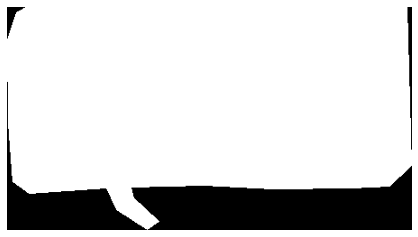

In [75]:
comics_page = get_all_comics_pages()[-1]
contours = comics_page.get_contours()

height, width = (int(comics_page.height), int(comics_page.width))
blank_image = np.zeros(shape=[height, width, 3], dtype=np.uint8)

cnt = contours[12]
x, y, w, h = cv2.boundingRect(cnt)
cv2.fillPoly(blank_image, [cnt], [255, 255, 255])

blank_image = blank_image[y:y + h, x:x + w]

# blank_image = get_blank_with_contours(contours, (int(comics_page.height), int(comics_page.width)))
gray = convert_blank_image_to_bw(blank_image)
display_image_in_actual_size(blank_image)
gray = np.where(gray == 0, 1, gray)
gray = np.where(gray > 1, 0, gray)

In [76]:
gray.shape

(248, 449)

In [77]:
import numpy
nrows = gray.shape[0]
ncols = gray.shape[1]
skip = 1
area_max = (0, [])

a = gray
w = numpy.zeros(dtype=int, shape=a.shape)
h = numpy.zeros(dtype=int, shape=a.shape)
for r in range(nrows):
    for c in range(ncols):
        if a[r][c] == skip:
            continue
        if r == 0:
            h[r][c] = 1
        else:
            h[r][c] = h[r-1][c]+1
        if c == 0:
            w[r][c] = 1
        else:
            w[r][c] = w[r][c-1]+1
        minw = w[r][c]
        for dh in range(h[r][c]):
            minw = min(minw, w[r-dh][c])
            area = (dh+1)*minw
            if area > area_max[0]:
                area_max = (area, [(r-dh, c-minw+1, r, c)])

print('area', area_max[0])
for t in area_max[1]:
    print('Cell 1:({}, {}) and Cell 2:({}, {})'.format(*t))

area 80388
Cell 1:(1, 20) and Cell 2:(198, 425)


In [78]:
area_max[1]

[(1, 20, 198, 425)]

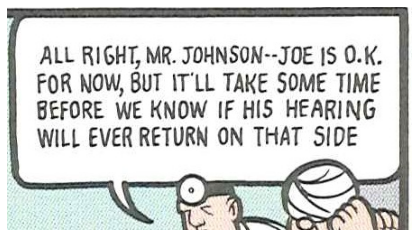

In [87]:
im = cv2.imread(r"C:\Users\newap\PycharmProjects\researchWorkCW3\experiments\ocr\dataset\WARE_ACME_032_12.jpg")
display_image_in_actual_size(im)

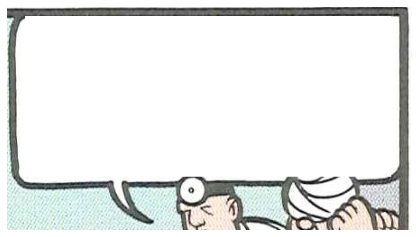

In [88]:
# Start coordinate, here (100, 50)
# represents the top left corner of rectangle
start_point = (int(area_max[1][0][1] * 1), int(area_max[1][0][0] + 10))

# Ending coordinate, here (125, 80)
# represents the bottom right corner of rectangle
end_point = (int(area_max[1][0][3] * 1), int(area_max[1][0][2] - 10))

# Black color in BGR
color = (255, 255, 255)

# Line thickness of -1 px
# Thickness of -1 will fill the entire shape
thickness = -1

# Using cv2.rectangle() method
# Draw a rectangle of black color of thickness -1 px
image = cv2.rectangle(im, start_point, end_point, color, thickness)

display_image_in_actual_size(image)

In [89]:
image.shape


(248, 449, 3)

In [90]:
######### WRITE TEXT INTO BUBBLE

def writeText(image, box_pts, text, visualize = False,
              font=cv2.FONT_HERSHEY_COMPLEX,
              font_size=0.5,
              font_thickness=1,
              lineType=cv2.LINE_AA):

    """
    Write text into rectangle determined by box_pts

    PARAMETERS
    ----------
    image: numpy.ndarray with shape (l, w, c)
    box_pts : tuple, (y0, y1, x0, x1) where (x0,y0) is top-left corner and (x1,y1) is bottom right corner of box
    text : str, text string to write into box

    RETURN
    ------
    None : write text directly into input image
    """

    if len(text) == 0:
        return

    y0, y1, x0, x1 = box_pts
    box_width = x1 - x0

    s, e = 0, 0
    ckpt = 0
    line_ix = 3

    while e < len(text):

        (text_length, text_height), baseline = cv2.getTextSize(text[s:e], font, font_size, font_thickness)
        y_pad = text_height + 4
        x_pad = 5

        if text_length <= box_width:
            if text[e] == ' ':
                ckpt = e
            e += 1

        else:
            line = text[s:ckpt]
            cv2.putText(image, line, (x0 + x_pad, y0 + y_pad*line_ix), font,
                        font_size,
                        (0,0,0),
                        font_thickness,
                        lineType)
            line_ix += 2
            s = ckpt + 1

    cv2.putText(image, text[s:], (x0 + x_pad, y0 + y_pad*line_ix), font,
                font_size,
                (0,0,0),
                font_thickness,
                lineType)

    if visualize:
        plt.imshow(image[y0:y1, x0:x1], cmap='gray')
        plt.show()


def rewrite_text_to_fit(text, box_width,
                       font=cv2.FONT_HERSHEY_COMPLEX,
                       font_size=0.5,
                       font_thickness=1):

    """
    Rewrite text such that long words which exceed box boundaries are split with hyphen

    PARAMETERS
    ----------
    text : str
    box_width : int, width of box which text is to be inserted into

    RETURN
    ------
    str : new text which conforms to box conditions

    """
    word_list = text.split(' ')
    updated_list = []
    for word in word_list:
        word_length = cv2.getTextSize(word, font, font_size, font_thickness)[0][0]
        if box_width < word_length:
            i = 0
            while cv2.getTextSize(word[:i]+'-', font, font_size, font_thickness)[0][0] < box_width:
                i +=1
            updated_list.append(word[:i-1]+'-')
            updated_list.append('-'+word[i-1:])

        elif cv2.getTextSize(word, font, font_size, font_thickness)[0][0] < box_width:
            updated_list.append(word)

    return ' '.join(updated_list)

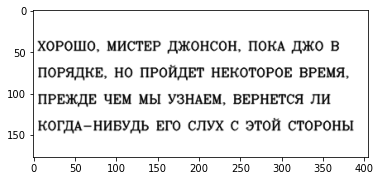

In [91]:
text = "ХОРОШО, МИСТЕР ДЖОНСОН, ПОКА ДЖО В ПОРЯДКЕ, НО ПРОЙДЕТ НЕКОТОРОЕ ВРЕМЯ, ПРЕЖДЕ ЧЕМ МЫ УЗНАЕМ, ВЕРНЕТСЯ ЛИ КОГДА-НИБУДЬ ЕГО СЛУХ С ЭТОЙ СТОРОНЫ"


output_image = image[:]
writeText(output_image, (start_point[1],end_point[1],start_point[0],end_point[0]), text , visualize=True)


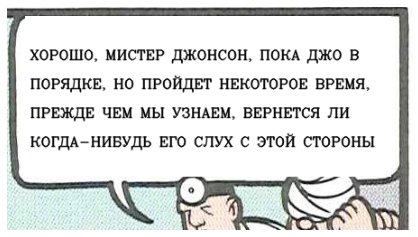

In [92]:
display_image_in_actual_size(output_image)